# Question 3 - Temporal Patterns and Selection Pressures  
### **Author:** Kaifeng Luo - M6  
### **Date:** 2025-03-08  
### **Description:**  
- This notebook investigates **temporal patterns of morphological traits** using **time series analysis, linear regression, and ANCOVA**.  
- The goal is to determine whether **size and shape parameters exhibit different evolutionary trends**, indicating **distinct selection pressures**.  
- Key analyses include:  
  - **Standardised time series plots** to visualise trait variations over time.  
  - **Linear regression** to assess individual trait trends.  
  - **ANCOVA** to compare evolutionary rates between different traits.  


### **Q3: Are the patterns of changes through time different for size than for other parameters, indicating different selection pressure?**  

To determine whether **size and shape parameters evolved under different selection pressures**, we applied three analytical approaches: **time series visualization, linear regression, and ANCOVA**. These methods allow us to assess whether (1) individual traits exhibit significant temporal trends, and (2) different traits evolved at different rates.

<br>

### **1. Time Series Analysis**  
By visualizing the **standardised time series of morphological parameters**, we observed:  
- **Shape parameters (Elongation, Sphericity) exhibited more pronounced and structured trends**.  
- **Size parameters remained relatively stable**, with only **DiameterMin increasing and DiameterMax decreasing**, suggesting a shift toward **more uniform size distribution** rather than overall size change.

<br>

### **2. Temporal Trends: Linear Regression Analysis**  
We applied **linear regression** to each parameter to quantify its trend over time.

| Parameter | Slope | R² | p-value |
|-----------|-----------|------------|-------------|
| **Size_Mean_Area** | **-0.1677** | 0.0445 | **3.45e-09**  |
| **Size_Mean_DiameterMean** | **-0.0041** | 0.000026 | **0.886**  |
| **Size_Mean_DiameterMin** | **0.0861** | 0.0117 | **0.0026**  |
| **Size_Mean_DiameterMax** | **-0.0703** | 0.0078 | **0.014**  |
| **Size_Mean_Perimeter** | **-0.0995** | 0.0157 | **4.97e-04**  |
| **Size_Mean_Elongation** | **-0.5395** | 0.4610 | **4.85e-105**  |
| **Size_Mean_Sphericity** | **0.5047** | 0.4035 | **4.07e-88**  |

**Key findings:**  
- **Shape parameters changed significantly** (Elongation ↓, Sphericity ↑), with **high R² values**, suggesting strong **selection pressures**.  
- **Size parameters showed moderate changes**, but **DiameterMean remained stable** (p = 0.886), indicating **size was more constrained** than shape.

<br>

### **3. Selection Pressures Across Traits: ANCOVA Analysis**  
To test whether **different traits evolved at different rates**, we conducted **ANCOVA**:

| Source         | Sum Sq | df  | F-Value | p-Value |
|---------------|--------|----|---------|---------|
| **Parameter**      | 7.34e-26 | 8  | 1.05e-26 | **1.000** |
| **Age**            | 0.185  | 1  | 0.212  | **0.645** |
| **Age × Parameter** | **910.37** | **8** | **130.69** | **6.18e-205** |

**Key findings:**  
- **The highly significant `Age × Parameter` term (p = 6.18e-205) confirms that different traits evolved at significantly different rates**.  
- **Shape parameters (Elongation, Sphericity) responded more strongly to evolutionary pressures**, while **size remained relatively stable**.  
- **The non-significant `Age` term (p = 0.645) suggests that time alone is not the primary driver of trait evolution**—selection pressures acted differently on different traits.

<br>

### **4. Interpretation: Different Selection Pressures on Size vs. Shape**  
- **Size parameters remained more stable**, with only **Min/Max adjustments**, suggesting **stabilizing selection on overall size**.
- **Shape parameters experienced stronger evolutionary shifts**, possibly driven by **functional constraints or ecological adaptation**.
- **ANCOVA confirms that different traits followed distinct evolutionary paths, supporting the hypothesis of different selection pressures.**

<br>

### **Conclusion**  
- **Size and shape parameters followed significantly different evolutionary trajectories, confirming the presence of different selection pressures.**  
- **Size remained relatively stable, while shape traits underwent more pronounced shifts, suggesting stronger morphological adaptation.**  
- **The combined results from time series visualization, linear regression, and ANCOVA provide robust evidence that evolutionary constraints differed between size and shape traits.**

**This analysis supports the hypothesis that different selection pressures influenced different aspects of morphology over time.**


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

In [2]:
# Load dataset
file_path = "combined_metrics.xlsx"
df = pd.read_excel(file_path)

# Rename column "Age(Ma)" to "Age" and sort data by Age
df.rename(columns={"Age(Ma)": "Age"}, inplace=True)
df.sort_values(by="Age", inplace=True)

# Define size-related parameters and shape-related parameters
size_params = [
    "Size.Mean.Area",
    "Size.Mean.DiameterMean",
    "Size.Mean.DiameterMin",
    "Size.Mean.DiameterMax",
    "Size.Mean.Perimeter"
]

shape_params = [
    "Size.Mean.GrayIntensity",
    "Size.Mean.ShapeFactor",
    "Size.Mean.Elongation",
    "Size.Mean.Sphericity"
]
# Perform linear interpolation for missing values in size-related parameters
for col in size_params:
    if df[col].isna().sum() > 0:
        df[col] = df[col].interpolate(method='linear')

# Standardization (Z-score normalization) for better visualization
scaler = StandardScaler()
df_standardized = df.copy()  # Copy to retain original values

# Apply standardization to size and shape parameters
df_standardized[size_params + shape_params] = scaler.fit_transform(df[size_params + shape_params])



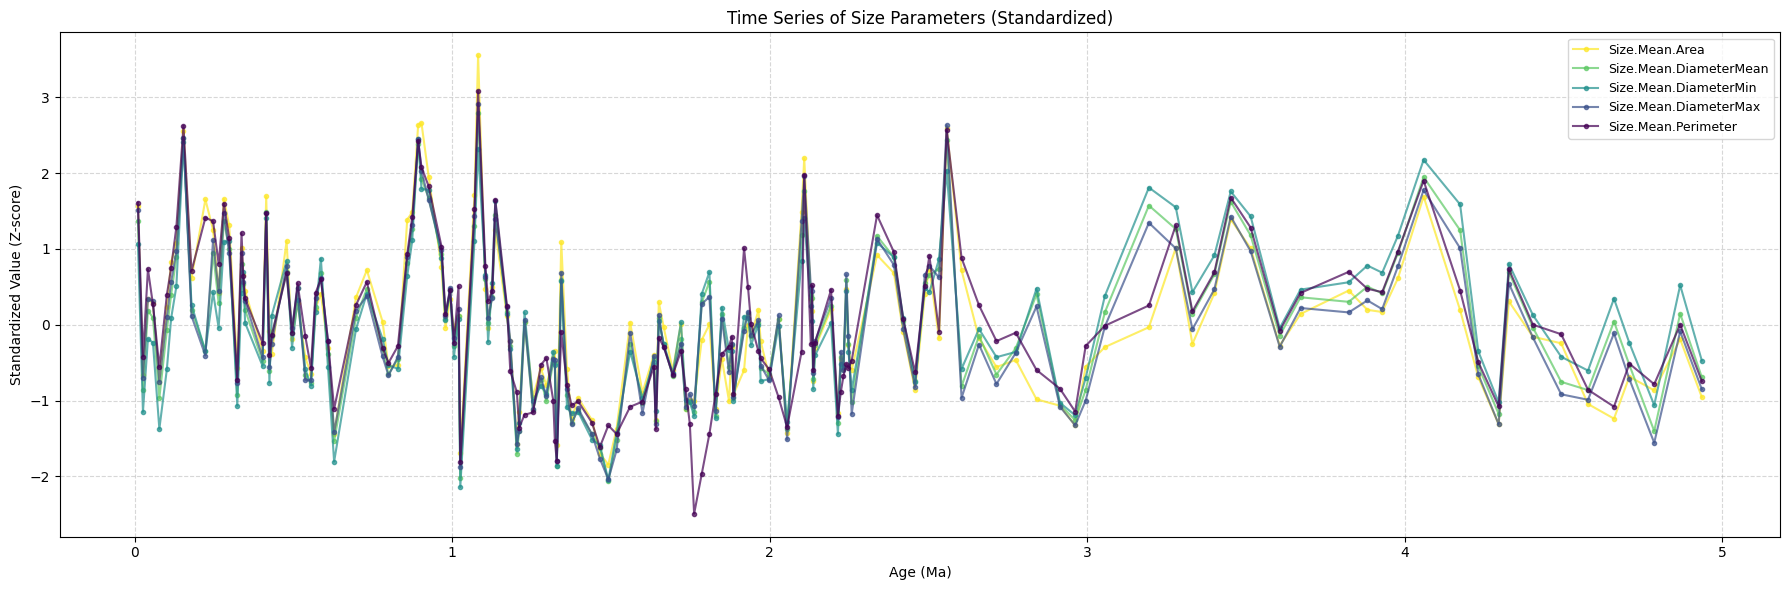

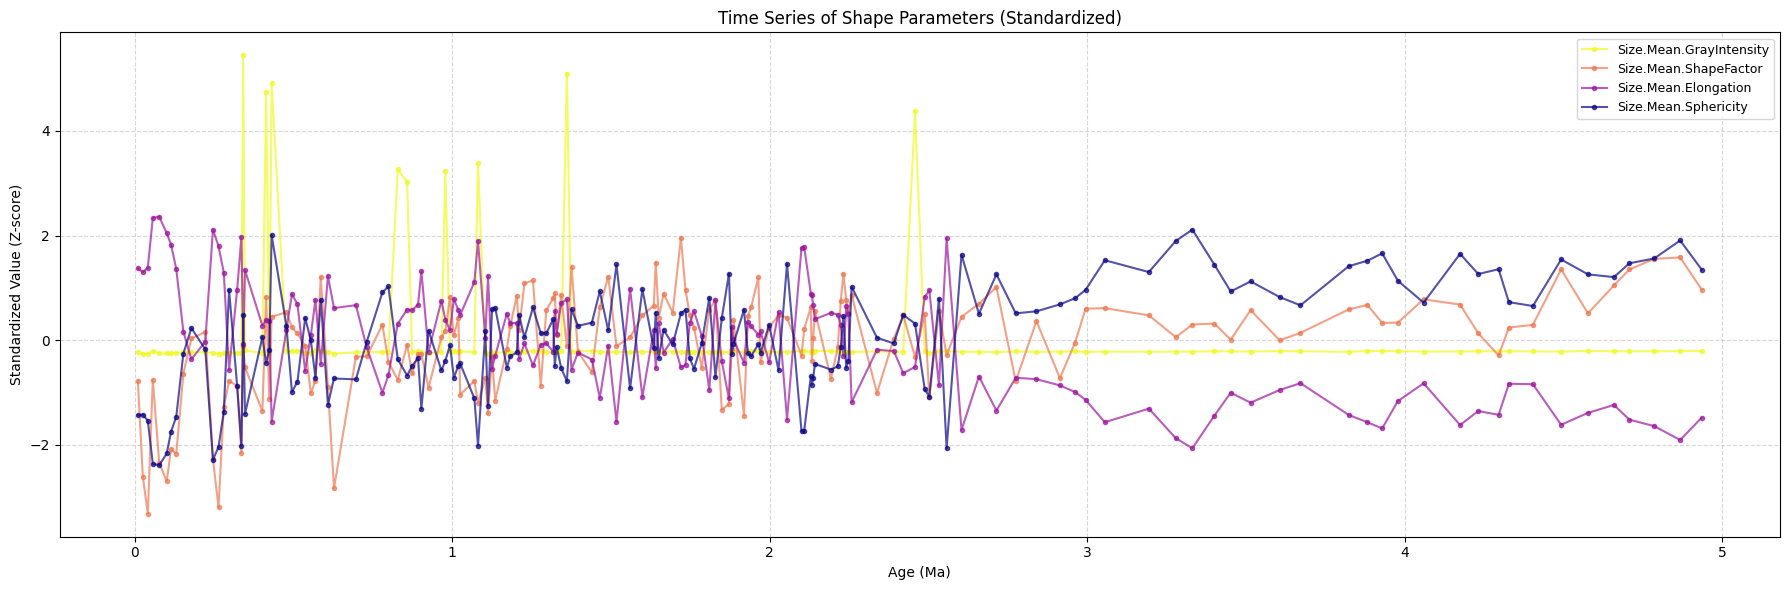

In [3]:
# Define color mappings for better readability
colors_size = plt.cm.viridis_r(np.linspace(0, 1, len(size_params)))
colors_shape = plt.cm.plasma_r(np.linspace(0, 1, len(shape_params)))

# Plot time series for size parameters
plt.figure(figsize=(18, 6))
for i, param in enumerate(size_params):
    plt.plot(df_standardized["Age"][::5], df_standardized[param][::5],
             marker='o', markersize=3, linestyle='-', alpha=0.7, label=param, color=colors_size[i])

# Formatting the plot
plt.xlabel("Age (Ma)")
plt.ylabel("Standardized Value (Z-score)")
plt.title("Time Series of Size Parameters (Standardized)") 
plt.legend(fontsize=9, loc='upper right', frameon=True) 
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot time series for shape parameters
plt.figure(figsize=(18, 6))
for i, param in enumerate(shape_params):
    plt.plot(df_standardized["Age"][::5], df_standardized[param][::5],
             marker='o', markersize=3, linestyle='-', alpha=0.7, label=param, color=colors_shape[i])

plt.xlabel("Age (Ma)")
plt.ylabel("Standardized Value (Z-score)")
plt.title("Time Series of Shape Parameters (Standardized)")
plt.legend(fontsize=9, loc='upper right', frameon=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Time Series Analysis**  
By standardising the data, we can observe the variation patterns of different parameters over time more clearly:  

### **1. Size Parameters**  
- **The trends of Area, Mean Diameter (DiameterMean), and Perimeter are broadly similar**:  
  - Their peaks and troughs occur almost simultaneously, suggesting that **size parameters may be influenced by similar environmental drivers**.  
  - There is a slight overall downward trend (as indicated by linear regression results), but the magnitude of change is relatively small.  

- **However, the Perimeter appears to fluctuate more significantly**:  
  - This could indicate that **Perimeter is more susceptible to environmental influences** or that its calculation method is more sensitive.  

### **2. Shape Parameters**  
- **Elongation and Sphericity exhibit an almost mirror-image relationship (negative correlation)**:  
  - When Elongation increases, Sphericity decreases, and vice versa.  
  - This is consistent with **the PCA results from Q2 (PC1: Sphericity 0.685, Elongation -0.684)**, indicating that their variation trend represents a primary direction of morphological change.  

- **Elongation and Shape Factor show a positive correlation**:  
  - This suggests that changes in Shape Factor may be related to elongation trends rather than independent morphological variations.  
  - **This is also supported by the PCA results (PC1: Shape Factor -0.235, Elongation -0.684)**, showing that they share a similar weighting direction in the principal components.  

### **Summary Notes on Time Series Analysis**  
1. **Size parameters exhibit a broadly consistent trend**:  
   - **Area, Mean Diameter (DiameterMean), and Perimeter share similar trends**, though Perimeter shows greater fluctuations.  
   - **Overall changes are minor, with a slight downward trend.**  

2. **Shape parameters show distinct internal correlations**:  
   - **Elongation and Sphericity are strongly negatively correlated (inverse relationship).**  
   - **Elongation and Shape Factor are positively correlated.**  
   - **This pattern aligns with the PCA analysis results, further confirming that morphology is primarily influenced by variations along these two directions.**  

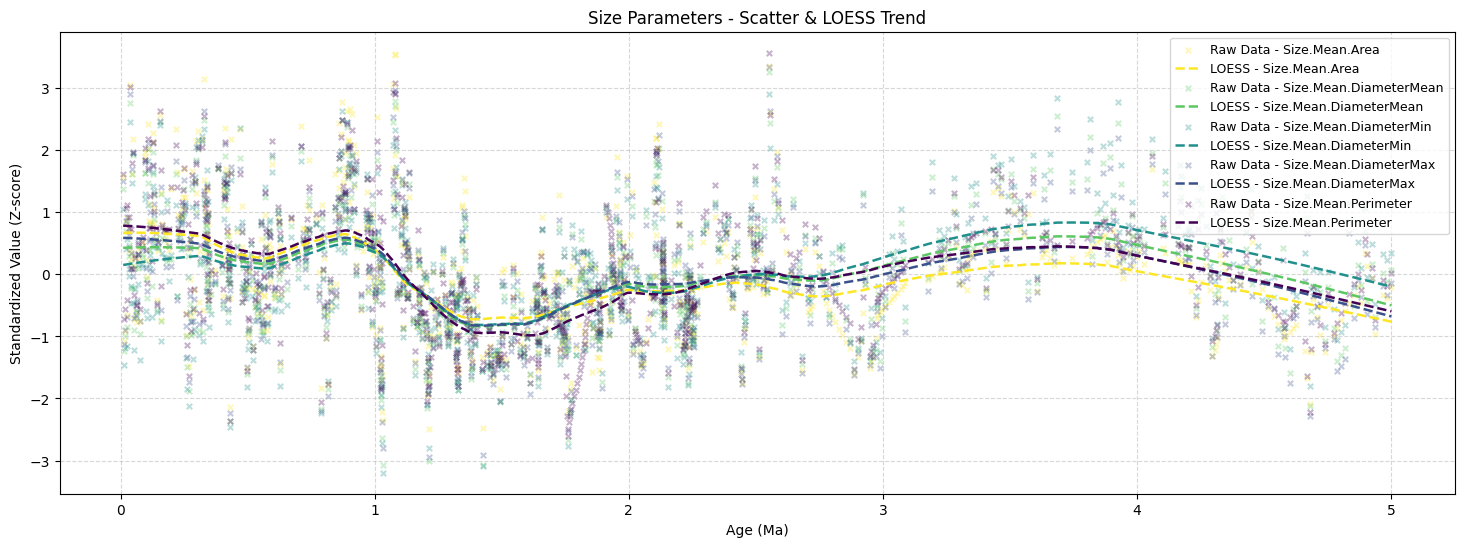

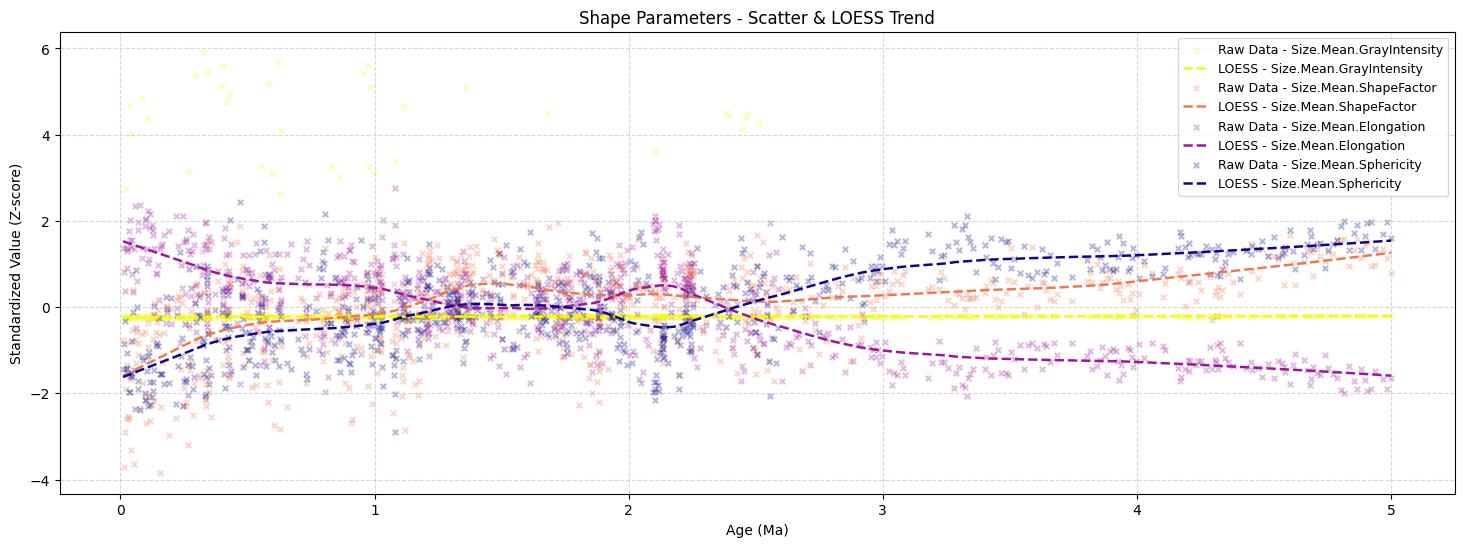

In [ ]:
# --------- Additional Feature: Scatter Plot + LOESS, Optimized Color Matching & Line Width ---------
def plot_scatter_loess(df, param_list, title, colors):
    """Plot scatter plots + LOESS trend fitting, ensuring color matching and adjusting dashed line width"""
    plt.figure(figsize=(18, 6))
    for i, param in enumerate(param_list):
        # Scatter plot - Lighter color with alpha 0.3 to reduce visual interference
        plt.scatter(df["Age"], df[param], alpha=0.3, label=f"Raw Data - {param}", color=colors[i], marker='x', s=15)

        # Compute LOESS fitting
        lowess = sm.nonparametric.lowess(df[param], df["Age"], frac=0.2, it=3)

        # LOESS line uses the same color but is fully opaque to enhance trend contrast, with a thinner dashed line
        plt.plot(lowess[:, 0], lowess[:, 1], label=f"LOESS - {param}", linestyle="--", color=colors[i], linewidth=1.8, alpha=1)

    plt.xlabel("Age (Ma)")
    plt.ylabel("Standardized Value (Z-score)")
    plt.title(f"{title} - Scatter & LOESS Trend")
    plt.legend(fontsize=9, loc="upper right", frameon=True)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# Use the same color scheme as previous charts to maintain consistency
scatter_loess_colors_size = colors_size
scatter_loess_colors_shape = colors_shape

# Redraw the optimized Scatter & LOESS charts
plot_scatter_loess(df_standardized, size_params, "Size Parameters", scatter_loess_colors_size)
plot_scatter_loess(df_standardized, shape_params, "Shape Parameters", scatter_loess_colors_shape)



### **Time Series Analysis (Scatter & LOESS Trend)**  
The addition of scatter plots and LOESS curves provides a clearer view of **selection pressures shaping morphological changes**. Unlike linear regression, which suggests a steady trend, LOESS reveals **non-linear variations**, highlighting potential episodic environmental influences.  


### **1. Size Parameters**  
- **Fluctuations suggest intermittent pressures**:  
  - While a slight long-term decline is evident, **local peaks and troughs indicate size was not consistently shrinking**, but responding dynamically to environmental shifts.  
  - These fluctuations suggest **selection pressures on size parameters were not uniform over time**.  

- **Perimeter deviates from Area and Mean Diameter**:  
  - While all three share broad trends, **Perimeter exhibits greater dispersion**, implying additional influencing factors, possibly **shape complexity or ecological constraints**.  


### **2. Shape Parameters**  
- **Non-linear evolution of Elongation and Sphericity**:  
  - Their **inverse relationship remains**, but the LOESS curves show phases of **abrupt shifts rather than gradual adaptation**, suggesting episodic selection pressures.  

- **Shape Factor and Elongation diverge in certain intervals**:  
  - Though generally correlated, **LOESS reveals time periods where Shape Factor stabilises while Elongation continues changing**, indicating **varying selective pressures acting on elongation specifically**.  


### **Key Insights on Selection Pressures**  
1. **Size changes were episodic, not continuous**, pointing to fluctuating selection pressures rather than a steady trend.  
2. **Shape parameters exhibit complex, non-linear shifts**, suggesting **morphological adaptation was not uniform across time**.  
3. **LOESS reveals deviations that linear regression overlooked**, reinforcing that **different parameters experienced varying evolutionary constraints.**  

**Selection pressures on size and shape varied over time, influencing different parameters in distinct ways rather than through uniform evolutionary forces.**

In [5]:
# Perform linear regression for each parameter to analyze trends over time
results = {}
for param in size_params + shape_params:
    valid_data = df_standardized[["Age", param]].dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(valid_data["Age"], valid_data[param])
    results[param] = {
        "slope": slope,
        "intercept": intercept,
        "r_value": r_value,
        "p_value": p_value,
        "r_squared": r_value**2,
        "std_err": std_err
    }

# Print regression results
print("Linear Regression Analysis Results:")
for param, res in results.items():
    print(f"{param} => slope: {res['slope']:.4f}, intercept: {res['intercept']:.4f}, "
          f"p-value: {res['p_value']:.4f}, R-squared: {res['r_squared']:.4f}, std_err: {res['std_err']:.4f}")

# Compare slope differences between "Size.Mean.DiameterMean" and other parameters
size_param = "Size.Mean.DiameterMean"
size_slope = results[size_param]["slope"]
print(f"\nComparing slope differences between {size_param} and other parameters:")
for param in size_params + shape_params:
    if param != size_param:
        diff = size_slope - results[param]["slope"]
        print(f"{size_param} vs. {param}: slope_diff = {diff:.4f}")

Linear Regression Analysis Results:
Size.Mean.Area => slope: -0.1677, intercept: 0.3048, p-value: 0.0000, R-squared: 0.0445, std_err: 0.0280
Size.Mean.DiameterMean => slope: -0.0041, intercept: 0.0074, p-value: 0.8868, R-squared: 0.0000, std_err: 0.0287
Size.Mean.DiameterMin => slope: 0.0861, intercept: -0.1565, p-value: 0.0026, R-squared: 0.0117, std_err: 0.0285
Size.Mean.DiameterMax => slope: -0.0703, intercept: 0.1279, p-value: 0.0141, R-squared: 0.0078, std_err: 0.0286
Size.Mean.Perimeter => slope: -0.0995, intercept: 0.1809, p-value: 0.0005, R-squared: 0.0157, std_err: 0.0285
Size.Mean.GrayIntensity => slope: -0.1175, intercept: 0.2137, p-value: 0.0000, R-squared: 0.0219, std_err: 0.0284
Size.Mean.ShapeFactor => slope: 0.3709, intercept: -0.6742, p-value: 0.0000, R-squared: 0.2179, std_err: 0.0254
Size.Mean.Elongation => slope: -0.5395, intercept: 0.9807, p-value: 0.0000, R-squared: 0.4610, std_err: 0.0211
Size.Mean.Sphericity => slope: 0.5047, intercept: -0.9175, p-value: 0.0000,

### **Linear Regression Analysis Results**  
#### **Key Findings**  

1. **Analysis of Slope and R² Values (Coefficient of Determination)**  
   - **`Size.Mean.Elongation` (Elongation) and `Size.Mean.Sphericity` (Sphericity) have the highest R² values (0.4610 and 0.4035),** indicating that their temporal variation trends are the strongest.  
   - **The slope of `Size.Mean.DiameterMean` (Mean Diameter) is close to zero (-0.0041), with a high p-value (0.8868),** suggesting that its change over time is not significant.  
   - **`Size.Mean.Area` (Area) and `Size.Mean.Perimeter` (Perimeter) have relatively low but significant negative slopes,** indicating a slight decline over time.  

2. **Comparison of Change Rates Between Morphological and Size Parameters**  
   - **Size parameters (Area, Diameter, Perimeter) have smaller slopes and lower R² values,** suggesting weaker temporal variation trends.  
   - **Shape parameters (Elongation, Sphericity) have larger slopes and higher R² values,** indicating a stronger evolutionary trend.  

3. **Slope Differences Between `Size.Mean.DiameterMean` and Other Parameters**  
   - The greatest slope difference is observed between `Size.Mean.DiameterMean` and `Size.Mean.Elongation` (0.5354).  
   - A significant slope difference is also found between `Size.Mean.DiameterMean` and `Size.Mean.Sphericity` (-0.5088).  
   - This suggests that **shape parameters evolve at a significantly faster rate than size parameters**.  

#### **Implications for the Research Question**  
- **Research Question 3：Are the patterns of changes through time different for size than for other parameters indicating different selection pressure？**  
  - **Shape parameters change at a significantly faster rate than size parameters**, which may suggest:  
    - **Size parameters are constrained by biophysical factors (e.g., structural limitations of the shell), leading to minimal variation.**  
    - **Shape parameters may be driven by environmental factors, such as adaptation to hydrodynamics or sedimentary conditions.**  
  - This further supports the hypothesis that **different morphological parameters may be subject to different selective pressures**.

In [ ]:
# Ensure column names are compatible with statsmodels (replace `.` with `_`)
df_standardized = df_standardized.rename(columns=lambda x: x.replace(".", "_"))

# Update parameter names
size_params = [col.replace(".", "_") for col in size_params]
shape_params = [col.replace(".", "_") for col in shape_params]

# Compute linear regression slope, p-value, and R-squared for each parameter
linreg_results = []
for param in size_params + shape_params:
    model = ols(f"{param} ~ Age", data=df_standardized).fit()
    linreg_results.append({
        "Parameter": param,
        "Slope": model.params["Age"],
        "R-squared": model.rsquared,
        "p-value": model.pvalues["Age"]
    })

# Convert results to DataFrame
df_linreg = pd.DataFrame(linreg_results)

# Display linear regression results (Method 1)
print(df_linreg)

# Save results as CSV (Method 2)
df_linreg.to_csv("linreg_results.csv", index=False)


                 Parameter     Slope  R-squared        p-value
0           Size_Mean_Area -0.167653   0.044522   3.453968e-09
1   Size_Mean_DiameterMean -0.004087   0.000026   8.867563e-01
2    Size_Mean_DiameterMin  0.086108   0.011745   2.618870e-03
3    Size_Mean_DiameterMax -0.070337   0.007837   1.406187e-02
4      Size_Mean_Perimeter -0.099538   0.015694   4.975398e-04
5  Size_Mean_GrayIntensity -0.117536   0.021882   3.819300e-05
6    Size_Mean_ShapeFactor  0.370876   0.217876   7.234587e-43
7     Size_Mean_Elongation -0.539487   0.461015  4.859193e-105
8     Size_Mean_Sphericity  0.504697   0.403474   4.069893e-88


## **ANCOVA Analysis: Testing Differences in Selection Pressures**

To determine whether **different parameters experienced distinct selection pressures**, we conducted an **Analysis of Covariance (ANCOVA)**. This allows us to test whether **different traits follow significantly different trends over time**.

### **Methodology**
- **Why ANCOVA?**  
  ANCOVA examines whether the relationship between **Age (time)** and different morphological parameters differs significantly.  
  If the **interaction term `Age:Parameter` is significant**, it suggests that different traits exhibit **different selection responses** over time.  

- **Statistical Model Used:**  
  We used the following model:  
$$ 
\text{Value} \sim \text{Age} \times \text{Parameter}
$$

  where:
  - **Value**: Standardised morphological trait measurement.
  - **Age**: Geological time in millions of years.
  - **Parameter**: The trait being measured (e.g., Area, Perimeter, Shape Factor, etc.).
  - **Age × Parameter** (Interaction Term): Tests whether different parameters follow different time-dependent trends.



In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Reshape data for ANCOVA
df_melted = df_standardized.melt(id_vars=["Age"], value_vars=size_params + shape_params, 
                                 var_name="Parameter", value_name="Value")

# Run ANCOVA model
ancova_model = ols("Value ~ Age * Parameter", data=df_melted).fit()
ancova_results = sm.stats.anova_lm(ancova_model, typ=2)

# Display ANCOVA results
print(ancova_results)

                     sum_sq      df             F         PR(>F)
Parameter      7.343282e-26     8.0  1.054220e-26   1.000000e+00
Age            1.848584e-01     1.0  2.123098e-01   6.449775e-01
Age:Parameter  9.103662e+02     8.0  1.306944e+02  6.176869e-205
Residual       6.010449e+03  6903.0           NaN            NaN


## **ANCOVA Results**
| Source         | Sum Sq | df  | F-Value | p-Value |
|---------------|--------|----|---------|---------|
| **Parameter**      | 7.34e-26 | 8  | 1.05e-26 | **1.000** |
| **Age**            | 0.185  | 1  | 0.212  | **0.645** |
| **Age × Parameter** | **910.37** | **8** | **130.69** | **6.18e-205** |
| **Residual**       | 6010.45 | 6903 | NaN | NaN |

### **Key Findings**
1. **Significant Interaction Effect (`Age × Parameter`, p = 6.18e-205)**
   - Different traits **exhibit significantly different evolutionary trends**.
   - This suggests that **different parameters were subject to different selection pressures**.
   - This aligns with **linear regression findings**, where some parameters (e.g., Elongation, Sphericity) changed significantly over time, while others (e.g., DiameterMean) remained stable.

2. **Non-significant `Age` Effect (p = 0.645)**
   - Time alone **does not drive trait variation in a uniform way**.
   - Instead, **the effect of time depends on the specific parameter being measured**.

3. **Size Parameters vs. Shape Parameters**
   - **Size parameters (e.g., DiameterMean) remained relatively stable**, except for **Min/Max adjustments**.
   - **Shape parameters (e.g., Elongation, Sphericity) exhibited stronger selection responses**, with **significant changes over time**.

### **Interpretation of Selection Pressures**
- **Morphological traits (shape parameters) experienced stronger selection pressures**, possibly due to functional adaptations.
- **Size traits remained more stable**, suggesting that **overall size was constrained by environmental limitations**.
- **The highly significant ANCOVA interaction term confirms that different traits followed distinct evolutionary paths**.

## **Final Conclusion**
**The ANCOVA results confirm that different morphological traits evolved under different selection pressures.**  
**Shape traits showed greater evolutionary flexibility, while size traits remained more stable over time.**  
**This supports the hypothesis that selection did not act uniformly across traits, leading to distinct patterns of morphological change.**
